# Practice 1: Measurement Model

## Objetives:
1. Estimate the measurement model for Technical Quality, Financial Quality, Assistance Quality, Satisfaction, and Loyalty.
2. Estimate convergent validity: AVE and Composite Reliability of the dimensions.
3. Estimate discriminant validity (square root of AVE x correlations).

In [295]:
import pandas as pd
import pyreadstat

df, meta = pyreadstat.read_sav("../data/EXERCICIO_2025.sav")
df.head()

,CASO,f1,f2,f3,f4,f5,f6,f7,P1.1_QA,P1.2_QA,...,P7,P14,ltv2,tempo,clsocial,SATIS,LEAL,ATEND,FIN,TEC
0,NaN,1.0,3.0,6.0,1.0,1.0,50.0,18.0,8.0,6.0,...,3.0,2.0,1373.0,61.0,5.0,6.50,6.2,7.2,9.333333,8.50
1,NaN,1.0,1.0,5.0,1.0,1.0,36.0,35.0,8.0,7.0,...,1.0,1.0,1002.0,47.0,5.0,5.50,4.4,6.8,6.666667,8.00
2,NaN,1.0,3.0,5.0,1.0,1.0,72.0,73.0,10.0,10.0,...,2.0,2.0,2097.0,83.0,5.0,7.50,8.0,9.6,10.000000,8.00
3,NaN,1.0,3.0,9.0,1.0,1.0,24.0,27.0,6.0,6.0,...,1.0,2.0,802.0,35.0,4.0,6.25,6.2,6.4,7.666667,6.50
4,NaN,1.0,4.0,9.0,1.0,1.0,72.0,24.0,2.0,5.0,...,2.0,1.0,4835.0,78.0,4.0,5.25,4.4,4.4,5.666667,5.75


In [296]:
filtered_cols = [
    'P1.1_QA', 'P1.2_QA', 'P1.3_QA', 'P1.4_QA', 'P1.5_QA',
    'P1.6_QC', 'P1.7_QC', 'P1.8_QC', 'P1.9_QC',
    'P1.10_QT', 'P1.11_QT', 'P1.12_QT', 'P1.13_QT', 'P1.14_QT',
    'P1.15_QA', 'P1.16_QA', 'P1.17_QA',
    'P3.1_S', 'P3.2_S', 'P3.3_S', 'P3.4_S',
    'P6.1_L', 'P6.2_L', 'P6.3_L', 'P6.4_L', 'P6.5_L', 'P6.6_L'
]

clean_df = df[filtered_cols].copy()

clean_df.rename(columns=lambda c: c.replace('.', '_'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('C', 'F'), inplace=True)
print(df.shape)
print(clean_df.shape)
print(clean_df.isnull().sum())

(493, 45)
(493, 27)
P1_1_QA     0
P1_2_QA     0
P1_3_QA     0
P1_4_QA     0
P1_5_QA     0
P1_6_QF     0
P1_7_QF     0
P1_8_QF     0
P1_9_QF     0
P1_10_QT    0
P1_11_QT    0
P1_12_QT    0
P1_13_QT    0
P1_14_QT    0
P1_15_QA    0
P1_16_QA    0
P1_17_QA    0
P3_1_S      0
P3_2_S      0
P3_3_S      0
P3_4_S      0
P6_1_L      0
P6_2_L      0
P6_3_L      0
P6_4_L      0
P6_5_L      0
P6_6_L      0
dtype: int64


## Normality check

### Univariate Normality

Skewness between -2 and +2 (George & Mallery (2010))

Excess Kurtosis between -7 and +7 (West, Finch, & Curran (1995))

In [297]:
from scipy.stats import skew, kurtosis
import pandas as pd

normality_results = []

for column in clean_df.columns:
    data = clean_df[column].dropna()
    skewness = skew(data)
    excess_kurtosis = kurtosis(data, fisher=True)  # Fisher=True gives excess kurtosis
    normality_results.append({
        'Variable': column,
        'Skewness': skewness,
        'Excess_Kurtosis': excess_kurtosis
    })

normality_df = pd.DataFrame(normality_results)
normality_df

,Variable,Skewness,Excess_Kurtosis
0,P1_1_QA,-0.556369,-0.121009
1,P1_2_QA,-0.541955,0.018259
2,P1_3_QA,-0.531412,0.112580
3,P1_4_QA,-0.257074,-0.868357
4,P1_5_QA,-0.354785,-0.628781
5,P1_6_QF,-1.019583,1.334556
6,P1_7_QF,-0.960815,0.685479
7,P1_8_QF,-0.580456,-0.236315
8,P1_9_QF,-0.833045,0.463907
9,P1_10_QT,-0.696651,-0.166048


### Multivariate normality

In [298]:
from pingouin import multivariate_normality

result = multivariate_normality(clean_df, alpha=0.05)
result

HZResults(hz=np.float64(1.054024583962217), pval=np.float64(0.0), normal=False)

Given the observed violation of multivariate normality and considering the available estimation methods in semopy, the MLW estimator (Maximum Likelihood with Wishart correction) was retained for this analysis. This decision was made to maintain compatibility with the class exercise requirements, as the original analysis conducted in AMOS (which also uses a covariance-based Maximum Likelihood estimation) served as the reference point for this study.

Standard errors were calculated using semopy's `se_robust=True` option,
which provides robust (sandwich-adjusted) standard errors to partially compensate for the effects of non-normality.
However, it is important to note that semopy does not produce robust fit indices (robust CFI or robust RMSEA).
If the data violates multivariate normality,
and robust fit indices or more advanced corrections (MLR or bootstrapping) are required,
it is recommended to use another lib/software.

## Modeling
Assistance Quality = QA

Financial Quality = QF

Technical Quality = QT

In [299]:
from semopy import Model

# Initial Model containing all items
# QA =~ P1_1_QA + P1_2_QA + P1_3_QA + P1_4_QA + P1_5_QA + P1_15_QA + P1_16_QA + P1_17_QA
# QF =~ P1_6_QF + P1_7_QF + P1_8_QF + P1_9_QF
# QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT + P1_14_QT
# S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
# L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L + P6_5_L + P6_6_L

model_description = """
QA =~ P1_1_QA + P1_2_QA + P1_4_QA + P1_5_QA + P1_16_QA
QF =~ P1_6_QF + P1_7_QF + P1_8_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT
S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L + P6_6_L
"""

model = Model(model_description)
print(model.fit(clean_df))

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.310
Number of iterations: 49
Params: 0.832 1.129 1.113 0.732 1.431 1.270 1.218 1.023 0.985 0.867 1.047 1.051 1.393 0.752 0.960 1.383 1.727 1.493 1.027 1.398 2.399 0.749 1.041 1.590 2.340 1.381 1.786 2.345 1.773 1.689 1.173 3.123 0.695 0.667 0.499 0.854 1.160 0.535 2.674 0.985 0.644 2.750 1.742 1.311 0.709 0.924 0.840 0.928 2.086 1.154 1.134 2.403


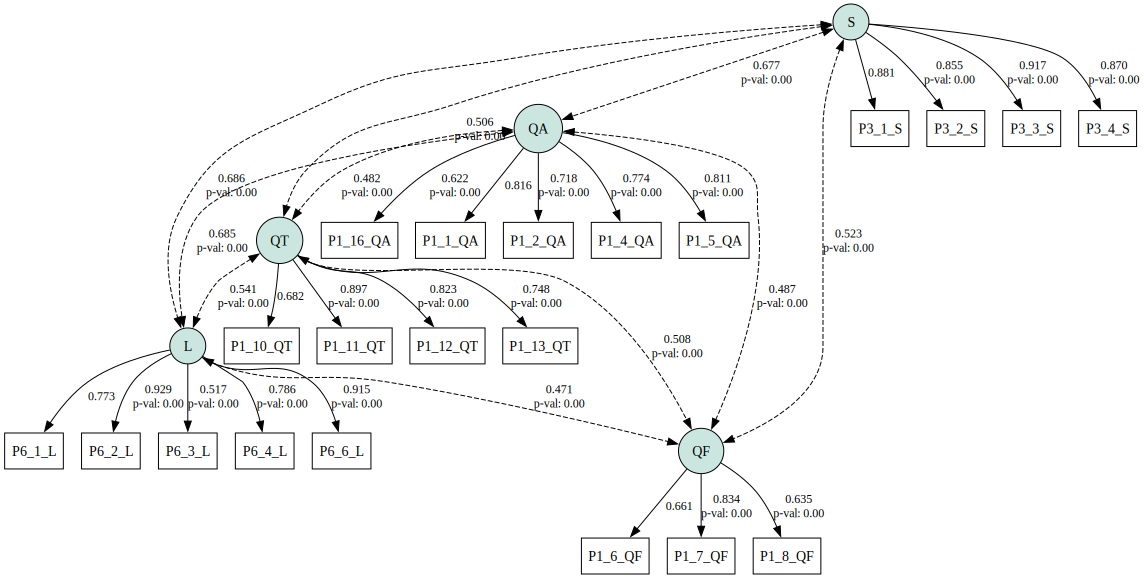

In [300]:
from semopy import semplot
semplot(model, "../practice 0/second_order_measurement_model.png", std_ests=True, plot_covs=True)

## Model Fit

$ \chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [301]:
from semopy import calc_stats

stats = calc_stats(model)
stats.T

,Value
DoF,179.000000
DoF Baseline,210.000000
chi2,645.615945
chi2 p-value,0.000000
chi2 Baseline,7179.709335
CFI,0.933051
GFI,0.910078
AGFI,0.894505
NFI,0.910078
TLI,0.921456


In [302]:
print("Default Model:", stats['chi2'] / stats['DoF'])
print("Independence Model:", stats['chi2 Baseline'] / stats['DoF Baseline'])

Default Model: Value    3.606793
dtype: float64
Independence Model: Value    34.189092
dtype: float64


## Parameter Estimates
$\lambda \geq 0.5$

In [303]:
estimates = (
    model.inspect(std_est=True, se_robust=True)
         .query("op == '~' and lval.str.startswith('P')", engine='python')
)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,P1_1_QA,~,QA,1.000000,0.815884,-,-,-
1,P1_2_QA,~,QA,0.832030,0.718314,0.048124,17.289265,0.0
2,P1_4_QA,~,QA,1.128879,0.774059,0.06353,17.769116,0.0
3,P1_5_QA,~,QA,1.112587,0.810934,0.059494,18.700991,0.0
4,P1_16_QA,~,QA,0.732125,0.621742,0.058666,12.479631,0.0
5,P1_6_QF,~,QF,1.000000,0.661054,-,-,-
6,P1_7_QF,~,QF,1.431336,0.834269,0.131531,10.882089,0.0
7,P1_8_QF,~,QF,1.270260,0.635462,0.141222,8.994805,0.0
8,P1_10_QT,~,QT,1.000000,0.681986,-,-,-
9,P1_11_QT,~,QT,1.217929,0.897316,0.082584,14.747764,0.0


After analyzing the model fit statistics and seeing that cutoff criteria were not met, through multiple iterations,
items P1_3_QA, P1_15_QA, P1_17_QA, P1_9_QF,
P1_14_QT and P6_5_L were removed from the model since they had the lowest standardized factor loadings and $R^2$

## Multicollinearity Check
$r_{XY} < 0.85$

In [304]:
latent_scores = model.predict_factors(clean_df)
correlation_matrix = latent_scores.corr()
correlation_matrix

,L,QA,QF,QT,S
L,1.000000,0.740839,0.537536,0.584895,0.725656
QA,0.740839,1.000000,0.565658,0.535584,0.733630
QF,0.537536,0.565658,1.000000,0.584271,0.593360
QT,0.584895,0.535584,0.584271,1.000000,0.549031
S,0.725656,0.733630,0.593360,0.549031,1.000000


## Validity and Reliability Analysis

$\lambda^2 > 0.2$

In [305]:
loadings = (
    model.inspect(std_est=True)
    .query("op == '~' and lval.str.startswith('P')", engine='python')
    .loc[:, ['lval', 'rval', 'Est. Std']]  # Item, Factor, lambda
    .rename(columns={'lval': 'Item', 'rval': 'Factor', 'Est. Std': 'lambda'})
)
loadings["lambdaˆ2"] = loadings["lambda"].apply(lambda x: x ** 2)
loadings["epsilon"] = loadings["lambdaˆ2"].apply(lambda x: 1 - x)
loadings

,Item,Factor,lambda,lambdaˆ2,epsilon
0,P1_1_QA,QA,0.815884,0.665666,0.334334
1,P1_2_QA,QA,0.718314,0.515975,0.484025
2,P1_4_QA,QA,0.774059,0.599168,0.400832
3,P1_5_QA,QA,0.810934,0.657614,0.342386
4,P1_16_QA,QA,0.621742,0.386563,0.613437
5,P1_6_QF,QF,0.661054,0.436992,0.563008
6,P1_7_QF,QF,0.834269,0.696005,0.303995
7,P1_8_QF,QF,0.635462,0.403812,0.596188
8,P1_10_QT,QT,0.681986,0.465106,0.534894
9,P1_11_QT,QT,0.897316,0.805177,0.194823


### Convergent Validity
$AVE \geq 0.5$
#### Average Variance Extracted (AVE)
Simplified formula

$\text{AVE} = \frac{\displaystyle\sum \lambda^{2}}{\displaystyle\sum \lambda^{2} + \sum \epsilon}$

In [306]:
factors = loadings['Factor'].unique().tolist()
items = loadings['Item'].unique().tolist()

In [307]:
import numpy as np
AVE = pd.DataFrame()
for factor_name in factors:
    factor_df = loadings.query(f"Factor == '{factor_name}'").copy()
    factor_AVE = factor_df['lambdaˆ2'].sum() / (factor_df['lambdaˆ2'].sum() + factor_df['epsilon'].sum())
    factor_AVE_sqrt = np.sqrt(factor_AVE)
    new_row = pd.DataFrame({'Factor': [factor_name], 'AVE': [factor_AVE], 'sqrt_AVE': [factor_AVE_sqrt]})
    AVE = pd.concat([AVE, new_row], ignore_index=True)
AVE

,Factor,AVE,sqrt_AVE
0,QA,0.564997,0.751663
1,QF,0.512270,0.715730
2,QT,0.626887,0.791762
3,S,0.775892,0.880847
4,L,0.636523,0.797824


### Composite Reliability (CR)
$CR \geq 0.7$

Simplified formula:

$\text{CR} =\frac{\displaystyle\left(\sum \lambda\right)^{2}}{\displaystyle\left(\sum \lambda\right)^{2} + \sum \epsilon}$

In [308]:
CR = pd.DataFrame()
for factor_name in factors:
    factor_df = loadings.query(f"Factor == '{factor_name}'").copy()
    factor_CR = (factor_df['lambda'].sum())**2 / ((factor_df['lambda'].sum())**2 + factor_df['epsilon'].sum())
    new_row = pd.DataFrame({'Factor': [factor_name], 'CR': [factor_CR]})
    CR = pd.concat([CR, new_row], ignore_index=True)
CR

,Factor,CR
0,QA,0.865487
1,QF,0.756274
2,QT,0.869297
3,S,0.932610
4,L,0.894242


### Cronbach’s Alpha
$\alpha \geq 0.7$

$\alpha = \frac{k}{k - 1} \left(1 - \frac{\sum_{i=1}^{k} \sigma_i^2}{\sigma_T^2}\right)$


$k$ = number of items

$\sigma_i^2$ = variance of item i

$\sigma_T^2$ = variance of the total score (sum of all items)

In [309]:
alpha_df = pd.DataFrame()
filtered_df = clean_df[items].copy()
for factor_name in factors:
    factor_df = filtered_df[[col for col in filtered_df.columns if col.endswith(factor_name)]].copy()

    variances = [np.var(factor_df[col], ddof=1) for col in factor_df.columns]
    total_variance = sum(variances)

    k = len(factor_df.columns)

    total_score_vector = factor_df.sum(axis=1)

    alpha = k / (k - 1) * (1 - (total_variance / np.var(total_score_vector, ddof=1)))

    new_row = pd.DataFrame({'Factor': [factor_name], 'alpha': [alpha], 'k': [k]})
    alpha_df = pd.concat([alpha_df, new_row], ignore_index=True)
alpha_df

,Factor,alpha,k
0,QA,0.860397,5
1,QF,0.727035,3
2,QT,0.859802,4
3,S,0.930651,4
4,L,0.890034,5


### Discriminant Validity
$\sqrt{\text{AVE}}_i > |r_{ij}|$


In [310]:
merged_df = AVE.merge(CR, on='Factor', how='left').merge(alpha_df, on='Factor', how='left')
merged_df

,Factor,AVE,sqrt_AVE,CR,alpha,k
0,QA,0.564997,0.751663,0.865487,0.860397,5
1,QF,0.512270,0.715730,0.756274,0.727035,3
2,QT,0.626887,0.791762,0.869297,0.859802,4
3,S,0.775892,0.880847,0.932610,0.930651,4
4,L,0.636523,0.797824,0.894242,0.890034,5


All cutoff criteria for CR, AVE and Crombach's alpha were met for all constructs

In [311]:
correlation_matrix

,L,QA,QF,QT,S
L,1.000000,0.740839,0.537536,0.584895,0.725656
QA,0.740839,1.000000,0.565658,0.535584,0.733630
QF,0.537536,0.565658,1.000000,0.584271,0.593360
QT,0.584895,0.535584,0.584271,1.000000,0.549031
S,0.725656,0.733630,0.593360,0.549031,1.000000


For each construct $\text{i}$,
the square root of its AVE is greater than the absolute value of its correlation with any other construct $\text{j}$.